In [12]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [13]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/reanalysis/ERA5/era5_yearly.nc')
 

data=data.squeeze()


data


<xarray.Dataset>
Dimensions:  (time: 12)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-16T12:00:00 ... 2020-12-16T12:00:00
    lon      float64 0.0
    lat      float64 0.0
Data variables:
    tp       (time) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Wed Jul 13 15:33:26 2022: cdo -L fldmean -ymonavg -remapnn,...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [3]:
x = data['tp']
x = x*1000*24


#data=data.to_array()


#plt.plot(x,data)

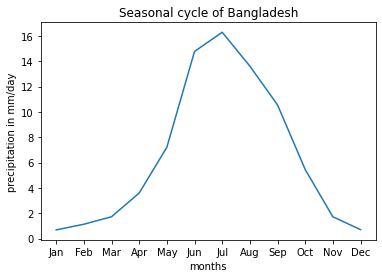

In [4]:
mon=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
#mon=['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N','D']

mon

plt.title('Seasonal cycle of Bangladesh')
plt.xlabel('months')
plt.ylabel('precipitation in mm/day')
plt.plot(mon,x)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/month-vs-pr-era5.png")



In [5]:
chirps_data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/chirps/chirps_yearcicle.nc')

chirps_data = chirps_data.squeeze()

chirps_data

<xarray.Dataset>
Dimensions:  (time: 12)
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 2022-02-01 ... 2021-12-01
    lon      float64 0.0
    lat      float64 0.0
Data variables:
    precip   (time) float32 ...
Attributes: (12/17)
    CDI:               Climate Data Interface version 1.9.9rc1 (https://mpime...
    Conventions:       CF-1.6
    history:           Mon Jul 11 11:59:05 2022: cdo -L fldmean -ymonavg -rem...
    institution:       Climate Hazards Group.  University of California at Sa...
    title:             CHIRPS Version 2.0
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 1.9.9rc1 (https://mpime...

In [6]:
x1 = chirps_data['precip']
x1 = x1/30.4167

In [7]:
miroc5_data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/MIROC5/miroc5_yearly.nc')

miroc5_data = miroc5_data.squeeze()

miroc5_data

<xarray.Dataset>
Dimensions:  (time: 12)
Coordinates:
  * time     (time) object 2005-01-16 12:00:00 ... 2005-12-16 12:00:00
    lon      float64 0.0
    lat      float64 0.0
Data variables:
    pr       (time) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Sat Jul 16 11:48:15 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MIROC-MIROC5, historical...
    driving_model_id:                                MIROC-MIROC5
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [8]:
x2 = miroc5_data['pr']
x2 = x2*86400

In [9]:
gcm_miroc5_data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/GCM/MIROC5/miroc5_yearly.nc')

gcm_miroc5_data = gcm_miroc5_data.squeeze()

gcm_miroc5_data


<xarray.Dataset>
Dimensions:  (time: 12)
Coordinates:
  * time     (time) object 2012-01-16 12:00:00 ... 2012-12-16 12:00:00
    lon      float64 0.0
    lat      float64 0.0
Data variables:
    pr       (time) float32 ...
Attributes: (12/29)
    CDI:                    Climate Data Interface version 1.9.9rc1 (https://...
    Conventions:            CF-1.4
    history:                Sat Jul 16 11:54:49 2022: cdo -L fldmean -ymonavg...
    source:                 MIROC5 2010 atmosphere: MIROC-AGCM6 (T85L40); oce...
    institution:            AORI (Atmosphere and Ocean Research Institute, Th...
    institute_id:           MIROC
    ...                     ...
    title:                  MIROC5 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.6
    CDO:                    Climate Data Operators version 1.9.9rc1 (https://...

In [10]:
x3 = gcm_miroc5_data['pr']
x3 = x3*86400


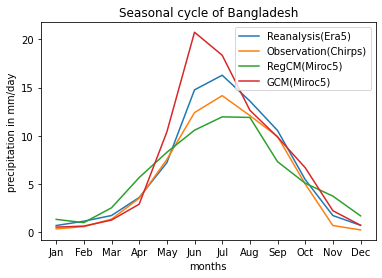

In [11]:
mon=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
#mon=['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N','D']

mon

plt.title('Seasonal cycle of Bangladesh')
plt.xlabel('months')
plt.ylabel('precipitation in mm/day')
plt.plot(mon,x,label='Reanalysis(Era5)')
plt.plot(mon,x1,label='Observation(Chirps)')
plt.plot(mon,x2,label='RegCM(Miroc5)')
plt.plot(mon,x3,label='GCM(Miroc5)')



plt.legend(loc='upper right')

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/month-vs-precipitation.png")
